In [183]:
from multiview.embed import gcca
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import orth
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
n = 100
m = 10
X = np.random.normal(0,10,size=(n,m))
a = np.array([2,3,5]).reshape(1,3)
X[:,:3] += np.arange(n).reshape(100,1) @ a


In [105]:
help(np.random.multivariate_normal)

Help on built-in function multivariate_normal:

multivariate_normal(...) method of numpy.random.mtrand.RandomState instance
    multivariate_normal(mean, cov, size=None, check_valid='warn', tol=1e-8)
    
    Draw random samples from a multivariate normal distribution.
    
    The multivariate normal, multinormal or Gaussian distribution is a
    generalization of the one-dimensional normal distribution to higher
    dimensions.  Such a distribution is specified by its mean and
    covariance matrix.  These parameters are analogous to the mean
    (average or "center") and variance (standard deviation, or "width,"
    squared) of the one-dimensional normal distribution.
    
    Parameters
    ----------
    mean : 1-D array_like, of length N
        Mean of the N-dimensional distribution.
    cov : 2-D array_like, of shape (N, N)
        Covariance matrix of the distribution. It must be symmetric and
        positive-semidefinite for proper sampling.
    size : int or tuple of ints, 

In [147]:
n = 100
m = 10
X1 = np.random.normal(0,1,size=(n,m))

cov = np.array([[1,0.5,0],
       [0.5, 1, 0.2],
       [0, 0.2, 1]]) * 10
cov = np.diag(np.ones(3))
mu = [0,0,0]
X1[:,:len(mu)] = np.random.multivariate_normal(mu, cov, size=(n,))

m = 6
X2 = np.random.normal(0,1,size=(n,m))

cov = np.array([[0.5,-0.5,0],
       [-0.5, 1, -0.2],
       [0, -0.2, 2]]) * 10
cov = np.diag(np.ones(3))
mu = [0,0,0]
X2[:,:len(mu)] = np.random.multivariate_normal(mu, cov, size=(n,))

In [156]:
U,D,Vt = svds(X1)
D = np.sort(D)[::-1]

In [157]:
func =  gcca._select_dimension

In [158]:
elbows, values, likelihoods = func(X=D, return_likelihoods=True)

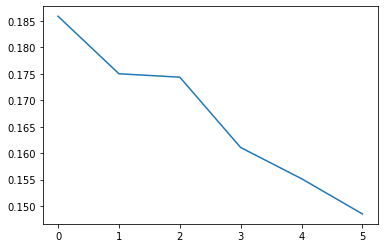

In [159]:
plt.plot(np.arange(len(D)), D/sum(D))

In [160]:
elbows

[3, 5]

In [140]:
np.cumsum(D/sum(D))

array([0.19192119, 0.36882429, 0.53562494, 0.69708904, 0.85456477,
       1.        ])

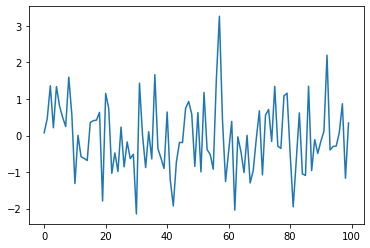

In [112]:
plt.plot(np.arange(n), X[:,0])

In [178]:
proj = gcca.GCCA().fit_transform([X1,X2], n_elbows=2)

In [177]:
proj.shape

(2, 100, 5)

In [167]:
help(gcca.GCCA)

Help on class GCCA in module multiview.embed.gcca:

class GCCA(multiview.embed.base.BaseEmbed)
 |  An implementation of Generalized Canonical Correalation Analysis. Computes
 |  individual projections into a common subspace such that the correlations
 |  between pairwise projections are minimized (ie. maximize pairwise
 |  correlation). Reduces to CCA in the two sample case.
 |  
 |  See https://www.sciencedirect.com/science/article/pii/S1053811912001644?
 |  via%3Dihub
 |  for relevant details.
 |  
 |  Method resolution order:
 |      GCCA
 |      multiview.embed.base.BaseEmbed
 |      sklearn.base.BaseEstimator
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  fit(self, Xs, fraction_var=None, sv_tolerance=None, n_components=None, n_elbows=2, tall=False)
 |      Calculates a projection from each view to a latentent space such that
 |      the sum of pariwise latent space corre

### Specific Elbows

In [184]:
def generate_data(n=10, elbows=3, seed=1):
    """
    Generate data matrix with a specific number of elbows on scree plot
    """
    np.random.seed(seed)
    x = np.random.binomial(1, 0.6, (n ** 2)).reshape(n, n)
    xorth = orth(x)
    d = np.zeros(xorth.shape[0])
    for i in range(0, len(d), int(len(d) / (elbows + 1))):
        d[:i] += 10
    A = xorth.T.dot(np.diag(d)).dot(xorth)
    return A, d

In [187]:
data, _ = generate_data(10, 3)
elbows, _, _ = gcca._select_dimension(X=data, n_elbows=2,
                                return_likelihoods=True)

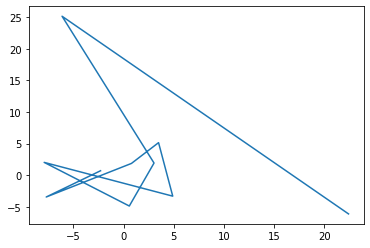

In [192]:
plt.plot(data[:,0], data[:,1])